###Kelompok 6

###Anggota :
- Daffa Fakhry Anshori (2200337)
- Alfen Fajri N (2201431)
- Jidan Abdurahman Aufan (2205422)
- Muhammad Rifky Afandi(2202346)

##Studi Kasus Klasifikasi Ekspresi Wajah
Dataset mengandung 3 kategori, yaitu sedih, senang, dan marah

Image diambil dari Google Images dan Freepik

Link Dataset :https://drive.google.com/drive/folders/1DvgaUj8gHk1IPT6iUBNj0FLmMaNzypMS?usp=sharing

Import Library

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [36]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [37]:
import pathlib

data_dir = '/content/drive/My Drive/Dataset Gambar Ekspresi Wajah/'
!dir '/content/drive/My Drive/Dataset Gambar Ekspresi Wajah'
data_dir_path = pathlib.Path(data_dir)

marah  sedih  senang


Menghitung jumlah data foto yang ada pada dataset

In [38]:
# jumlah instance dataset
image_count = len(list(data_dir_path.glob('*/*.[jp]*')))
print(image_count)

789


Berapa kelas dataset yang ada

In [39]:
import os

list_dir = [os.path.basename(x) for x in data_dir_path.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
for x in list_dir:
 print("{} = {} ".format(x,len(list(data_dir_path.glob('{}/*.jpg'.format(x))) + list(data_dir_path.glob('{}/*.jpeg'.format(x))) + list(data_dir_path.glob('{}/*.png'.format(x))))))

Jumlah class: 3 
Jumlah instance per class
senang = 360 
sedih = 224 
marah = 205 


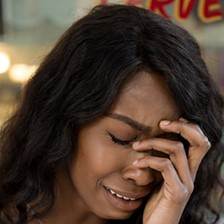

In [40]:
sedih = list(data_dir_path.glob('sedih/*'))
PIL.Image.open(str(sedih[1]))

Data Training


In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=90,
 )

Found 789 files belonging to 3 classes.
Using 592 files for training.


Data Validasi

In [42]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.25,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=90
)

Found 789 files belonging to 3 classes.
Using 197 files for validation.


In [43]:
class_names = train_ds.class_names
print(class_names)

['marah', 'sedih', 'senang']


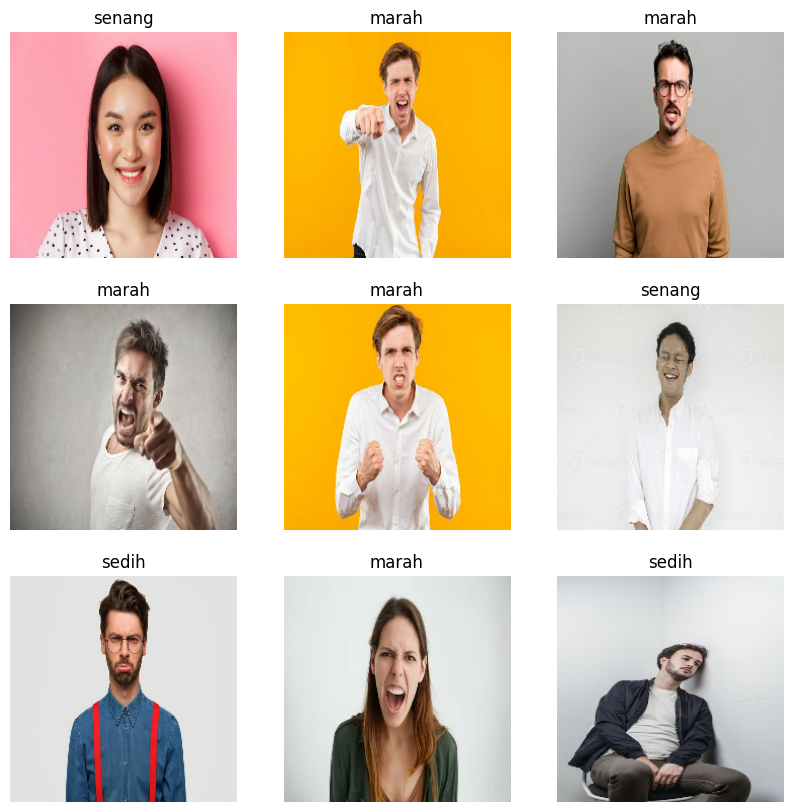

In [44]:
# lihat dataset training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

In [45]:
for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 print(labels_batch.shape)
 break

(90, 224, 224, 3)
(90,)


In [46]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Melakukan normalisasi

In [47]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.019750446 1.0


In [48]:
num_classes = len(class_names)


model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 64)       

In [49]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [50]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
7/7 [==============================] - 5s 381ms/step - loss: 2.8106 - accuracy: 0.3226 - val_loss: 1.0900 - val_accuracy: 0.4721
Epoch 2/10
7/7 [==============================] - 1s 81ms/step - loss: 1.0709 - accuracy: 0.4561 - val_loss: 1.0626 - val_accuracy: 0.4670
Epoch 3/10
7/7 [==============================] - 1s 81ms/step - loss: 1.0366 - accuracy: 0.4696 - val_loss: 1.0447 - val_accuracy: 0.4619
Epoch 4/10
7/7 [==============================] - 1s 81ms/step - loss: 0.9906 - accuracy: 0.4949 - val_loss: 1.0336 - val_accuracy: 0.5025
Epoch 5/10
7/7 [==============================] - 1s 80ms/step - loss: 0.9209 - accuracy: 0.6014 - val_loss: 1.0645 - val_accuracy: 0.5076
Epoch 6/10
7/7 [==============================] - 1s 81ms/step - loss: 0.8475 - accuracy: 0.6301 - val_loss: 1.0648 - val_accuracy: 0.4721
Epoch 7/10
7/7 [==============================] - 1s 82ms/step - loss: 0.7947 - accuracy: 0.6334 - val_loss: 1.1686 - val_accuracy: 0.4467
Epoch 8/10
7/7 [==========

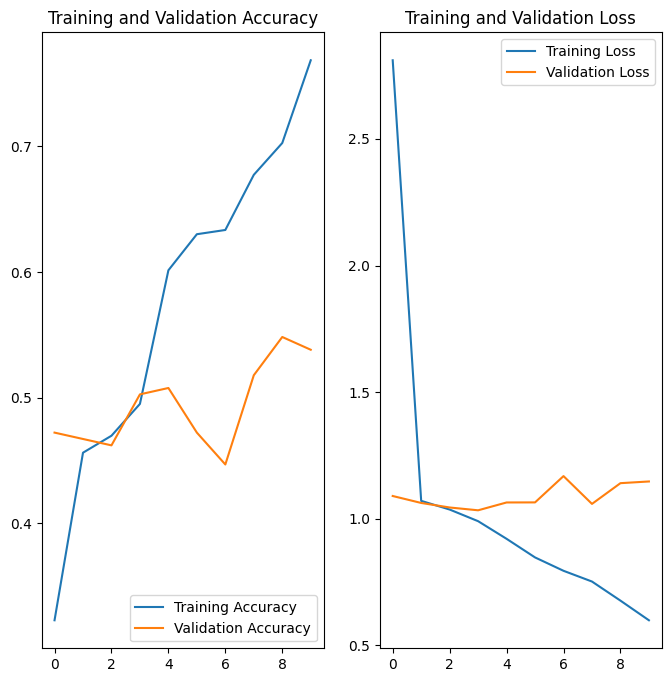

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
data_augmentation = keras.Sequential(
 [
   layers.RandomFlip("horizontal", input_shape=(224, 224,3)),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
 ]
)


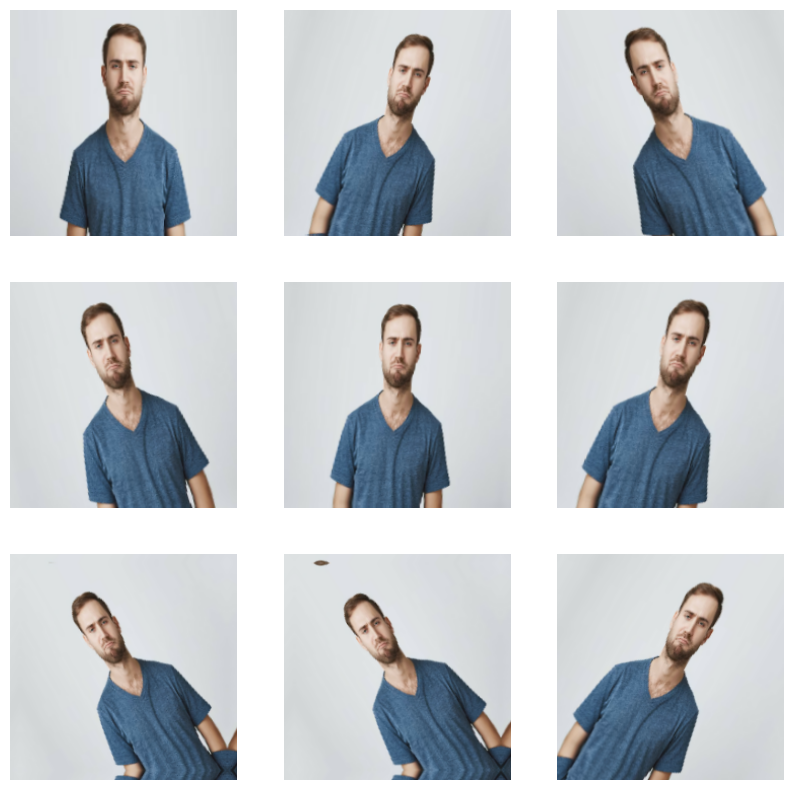

In [53]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
 for i in range(9):
   augmented_images = data_augmentation(images)
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(augmented_images[0].numpy().astype("uint8"))
   plt.axis("off")

Mencoba Membangun Arsitektur Model dengan Data Augmentation

In [54]:
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                

In [55]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [56]:
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=15
)


Epoch 1/15
7/7 [==============================] - 4s 183ms/step - loss: 2.9847 - accuracy: 0.3750 - val_loss: 1.1508 - val_accuracy: 0.4619
Epoch 2/15
7/7 [==============================] - 1s 135ms/step - loss: 1.1317 - accuracy: 0.3885 - val_loss: 1.0627 - val_accuracy: 0.4619
Epoch 3/15
7/7 [==============================] - 1s 136ms/step - loss: 1.0583 - accuracy: 0.4544 - val_loss: 1.0572 - val_accuracy: 0.4619
Epoch 4/15
7/7 [==============================] - 1s 121ms/step - loss: 1.0539 - accuracy: 0.4696 - val_loss: 1.0489 - val_accuracy: 0.4721
Epoch 5/15
7/7 [==============================] - 1s 118ms/step - loss: 1.0403 - accuracy: 0.4882 - val_loss: 1.0437 - val_accuracy: 0.4721
Epoch 6/15
7/7 [==============================] - 1s 118ms/step - loss: 1.0211 - accuracy: 0.4983 - val_loss: 1.0289 - val_accuracy: 0.4975
Epoch 7/15
7/7 [==============================] - 1s 118ms/step - loss: 1.0019 - accuracy: 0.5068 - val_loss: 1.0426 - val_accuracy: 0.5076
Epoch 8/15
7/7 [====

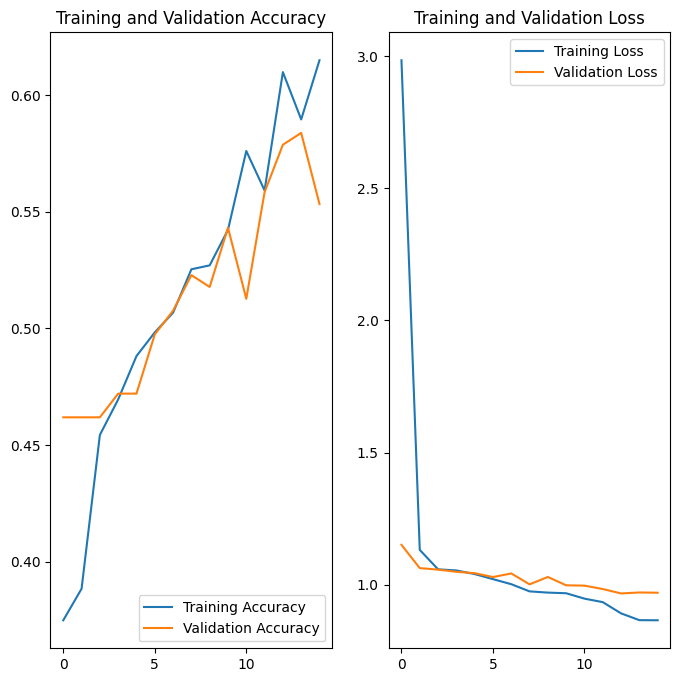

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']

val_loss = history.history['val_loss']


epochs_range = range(15)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Mencoba Membangun Arsitektur Model dengan Data Augmentation Alternatif (1)

In [69]:
# Define the model
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.25),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.4),

 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])

# Print the model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                               

In [70]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [75]:
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=30
)


Epoch 1/30
7/7 [==============================] - 1s 135ms/step - loss: 0.9880 - accuracy: 0.5220 - val_loss: 1.0128 - val_accuracy: 0.5330
Epoch 2/30
7/7 [==============================] - 1s 122ms/step - loss: 0.9824 - accuracy: 0.5236 - val_loss: 1.0106 - val_accuracy: 0.5431
Epoch 3/30
7/7 [==============================] - 1s 133ms/step - loss: 0.9715 - accuracy: 0.5389 - val_loss: 1.0096 - val_accuracy: 0.5178
Epoch 4/30
7/7 [==============================] - 1s 141ms/step - loss: 0.9637 - accuracy: 0.5507 - val_loss: 1.0035 - val_accuracy: 0.5381
Epoch 5/30
7/7 [==============================] - 1s 142ms/step - loss: 0.9623 - accuracy: 0.5557 - val_loss: 1.0079 - val_accuracy: 0.5178
Epoch 6/30
7/7 [==============================] - 1s 140ms/step - loss: 0.9534 - accuracy: 0.5439 - val_loss: 1.0223 - val_accuracy: 0.5025
Epoch 7/30
7/7 [==============================] - 1s 137ms/step - loss: 0.9460 - accuracy: 0.5557 - val_loss: 0.9894 - val_accuracy: 0.5482
Epoch 8/30
7/7 [====

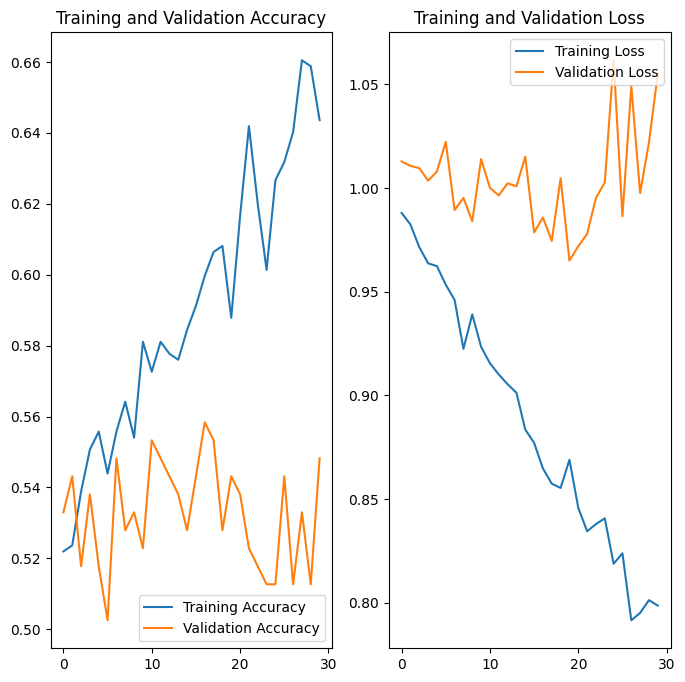

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']

val_loss = history.history['val_loss']


epochs_range = range(30)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [82]:
save1 = model

Mencoba Membangun Arsitektur Model dengan Data Augmentation Alternatif (2)

In [134]:
# Define the model
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.25),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.3),

 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])

# Print the model summary
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_25 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_89 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                               

In [135]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [136]:
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=30
)


Epoch 1/30
7/7 [==============================] - 4s 165ms/step - loss: 2.4999 - accuracy: 0.3125 - val_loss: 1.1039 - val_accuracy: 0.2487
Epoch 2/30
7/7 [==============================] - 1s 128ms/step - loss: 1.0997 - accuracy: 0.3750 - val_loss: 1.0932 - val_accuracy: 0.4619
Epoch 3/30
7/7 [==============================] - 1s 128ms/step - loss: 1.0795 - accuracy: 0.4544 - val_loss: 1.0621 - val_accuracy: 0.4619
Epoch 4/30
7/7 [==============================] - 1s 128ms/step - loss: 1.0643 - accuracy: 0.4544 - val_loss: 1.0624 - val_accuracy: 0.4619
Epoch 5/30
7/7 [==============================] - 1s 128ms/step - loss: 1.0596 - accuracy: 0.4544 - val_loss: 1.0699 - val_accuracy: 0.4619
Epoch 6/30
7/7 [==============================] - 1s 127ms/step - loss: 1.0619 - accuracy: 0.4544 - val_loss: 1.0625 - val_accuracy: 0.4619
Epoch 7/30
7/7 [==============================] - 1s 128ms/step - loss: 1.0559 - accuracy: 0.4544 - val_loss: 1.0584 - val_accuracy: 0.4619
Epoch 8/30
7/7 [====

Test Model

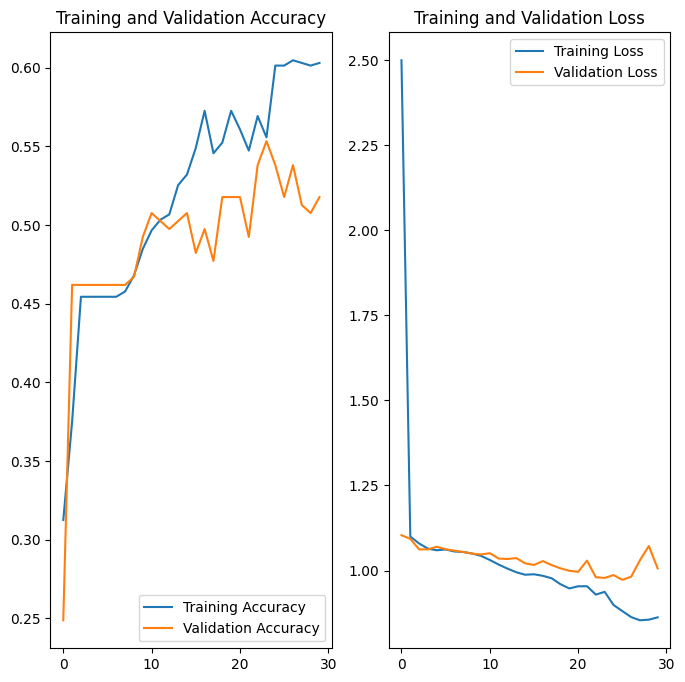

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']

val_loss = history.history['val_loss']


epochs_range = range(30)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Ternyata Alternatif 2 walaupun dengan Epoch lebih banyak masih lebih jelek dibanding model Alternatif 1, maka yang akan digunakan adalah Alternatif 1

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to sedih with a 48.45 percent confidence.


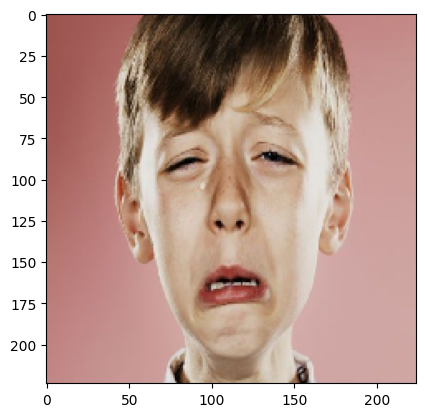

In [138]:
image_baru_url = "https://i.pinimg.com/originals/44/4c/2b/444c2b1160898a5ecaa3b925cbb4d3df.jpg"
image_baru_path = tf.keras.utils.get_file('', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(224, 224)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = save1.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 21ms/step
This image most likely belongs to senang with a 73.08 percent confidence.


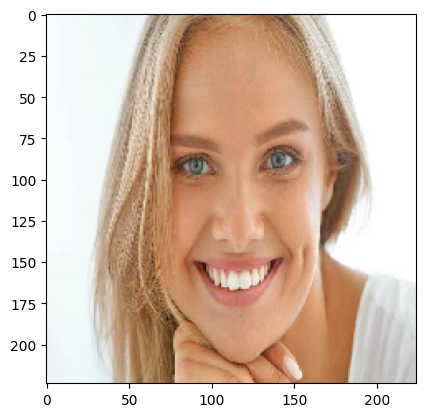

In [139]:
image_baru_url = "https://premierholisticdental.com/images/Veneers.jpg"
image_baru_path = tf.keras.utils.get_file('', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(224, 224)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = save1.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 27ms/step
This image most likely belongs to marah with a 55.20 percent confidence.


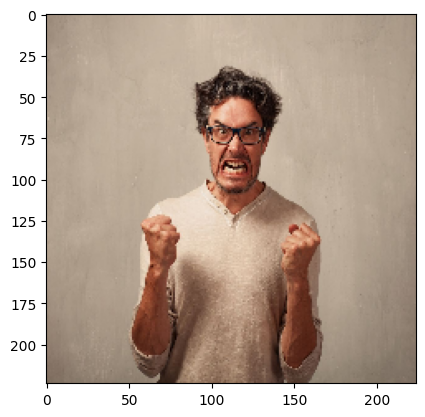

In [140]:
image_baru_url = "https://cdn.mos.cms.futurecdn.net/YdGPmBa6UZj8pxM95T2ADA-1200-80.jpg"
image_baru_path = tf.keras.utils.get_file('', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(224, 224)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = save1.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Sebenarnya hasil masih belum memuaskan, setelah berkali - kali mencoba arsitektur model yang berbeda pun tidak ada peningkatan yang signifikan, hal ini mungkin disebabkan oleh data yang kurang sesuai dan imbalance antara kategori, seperti Garbage in Garbage out, perbaikan untuk kedepannya adalah mencari data yang lebih sesuai dan menyeimbangkan jumlah data antar kategori.